## YouBike :)

- 題目：研究捷運公館站(2號出口) YouBike 站點是否需要提高補車頻率

    -- 以 7/17 16:00 ~ 7/18 22:00 （30hr）作為分析區間

### Read Dataset

In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [3]:
conn = sqlite3.connect('/Users/ct/Desktop/youbike.db')
youbike_10 = pd.read_sql_query("SELECT * FROM youbike_tp_table", conn)
youbike_20 = pd.read_sql_query("SELECT * FROM youbike_tp20_table", conn)

In [4]:
# sno = 站點代號
# sna = 場站中文名稱
# tot = 場站總停車格
# sbi = 場站目前車輛數量
# sarea = 場站區域
# mday = 資料更新時間
# lat = 緯度
# lng = 經度
# ar = 地點
# sareaen = 場站區域英文
# snaen = 場站名稱英文
# aren = 地址英文
# bemp = 空位數量
# act = 全站禁用狀態 (1代表可用、0代表禁用)
youbike_10.head()

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act
0,1,捷運市政府站(3號出口),88,32,信義區,20220717014439,25.040858,121.567904,忠孝東路/松仁路(東南側),Xinyi Dist.,MRT Taipei City Hall Stataion(Exit 3)-2,The S.W. side of Road Zhongxiao East Road & Ro...,56,1
1,2,捷運國父紀念館站(2號出口),16,0,大安區,20220717014423,25.041254,121.557420,忠孝東路四段/光復南路口(西南側),Daan Dist.,MRT S.Y.S Memorial Hall Stataion(Exit 2.),"Sec,4. Zhongxiao E.Rd/GuangFu S. Rd",16,1
2,4,市民廣場,32,18,信義區,20220717014434,25.036036,121.562325,市府路/松壽路(西北側)(鄰近台北101/台北世界貿易中心/台北探索館),Xinyi Dist.,Citizen Square,The N.W. side of Road Shifu & Road Song Shou.,14,1
3,5,興雅國中,32,11,信義區,20220717014432,25.036564,121.568664,松仁路/松仁路95巷(東南側)(鄰近信義商圈/台北信義威秀影城),Xinyi Dist.,Xingya Jr. High School,"The S.E. side of Road Songren & Ln. 95, Songre...",20,1
4,6,臺北南山廣場,54,1,信義區,20220717014445,25.034047,121.565973,松智路/松廉路(東北側) (鄰近台北101/信義商圈/台北信義威秀影城),Xinyi Dist.,NAN SHAN PLAZA,The N.E. side of Road Song Zhi & Road Song Lian.,53,1


In [5]:
# sno = 站點代號
# sna = 場站中文名稱
# tot = 場站總停車格
# sbi = 場站目前車輛數量
# sarea = 場站區域
# mday = 資料更新時間
# lat = 緯度
# lng = 經度
# ar = 地點
# sareaen = 場站區域英文
# snaen = 場站名稱英文
# aren = 地址英文
# bemp = 空位數量
# act = 全站禁用狀態 (1代表可用、0代表禁用)
youbike_20.head()

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act
0,500101001,YouBike2.0_捷運科技大樓站,28,18,大安區,2022-07-17 01:59:11,25.02605,121.54360,復興南路二段235號前,Daan Dist.,YouBike2.0_MRT Technology Bldg. Sta.,No.235， Sec. 2， Fuxing S. Rd.,10,1
1,500101002,YouBike2.0_復興南路二段273號前,22,14,大安區,2022-07-17 02:14:38,25.02565,121.54357,復興南路二段273號西側,Daan Dist.,YouBike2.0_No.273， Sec. 2， Fuxing S. Rd.,No.273， Sec. 2， Fuxing S. Rd. (West),8,1
2,500101003,YouBike2.0_國北教大實小東側門,16,12,大安區,2022-07-17 02:07:11,25.02429,121.54124,和平東路二段96巷7號,Daan Dist.,YouBike2.0_NTUE Experiment Elementary School (...,No. 7， Ln. 96， Sec. 2， Heping E. Rd,4,1
3,500101004,YouBike2.0_和平公園東側,11,8,大安區,2022-07-17 01:37:38,25.02351,121.54282,和平東路二段118巷33號,Daan Dist.,YouBike2.0_Heping Park (East),No. 33， Ln. 118， Sec. 2， Heping E. Rd,3,1
4,500101005,YouBike2.0_辛亥復興路口西北側,16,5,大安區,2022-07-17 00:40:16,25.02153,121.54299,復興南路二段368號,Daan Dist.,YouBike2.0_Xinhai Fuxing Rd. Intersection (Nor...,No. 368， Sec. 2， Fuxing S. Rd.,11,1


In [6]:
youbike_10.shape

(452770, 14)

In [7]:
youbike_20.shape

(1279757, 14)

In [8]:
youbike_10.dtypes

sno          int64
sna         object
tot          int64
sbi          int64
sarea       object
mday        object
lat        float64
lng        float64
ar          object
sareaen     object
snaen       object
aren        object
bemp         int64
act          int64
dtype: object

In [9]:
youbike_10['mday'] = pd.to_datetime(youbike_10['mday'])
youbike_10['mday']

0        2022-07-17 01:44:39
1        2022-07-17 01:44:23
2        2022-07-17 01:44:34
3        2022-07-17 01:44:32
4        2022-07-17 01:44:45
                 ...        
452765   2022-07-18 22:05:41
452766   2022-07-18 22:05:31
452767   2022-07-18 22:04:42
452768   2022-07-18 22:05:31
452769   2022-07-18 22:05:35
Name: mday, Length: 452770, dtype: datetime64[ns]

In [10]:
youbike_20.dtypes

sno          int64
sna         object
tot          int64
sbi          int64
sarea       object
mday        object
lat        float64
lng        float64
ar          object
sareaen     object
snaen       object
aren        object
bemp         int64
act          int64
dtype: object

In [11]:
youbike_20['mday'] = pd.to_datetime(youbike_20['mday'])
youbike_20['mday']

0         2022-07-17 01:59:11
1         2022-07-17 02:14:38
2         2022-07-17 02:07:11
3         2022-07-17 01:37:38
4         2022-07-17 00:40:16
                  ...        
1279752   2022-07-18 19:51:04
1279753   2022-07-18 22:00:30
1279754   2022-07-18 21:48:38
1279755   2022-07-18 21:15:05
1279756   2022-07-18 21:56:04
Name: mday, Length: 1279757, dtype: datetime64[ns]

In [12]:
youbike_10.describe(include = 'all')

<ipython-input-12-0d41739cd6f9>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  youbike_10.describe(include = 'all')


,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act
count,452770.000000,452770,452770.000000,452770.000000,452770,452770,452770.000000,452770.000000,452770,452770,452770,452770,452770.000000,452770.0
unique,NaN,373,NaN,NaN,12,42620,NaN,NaN,373,12,372,371,NaN,NaN
top,NaN,捷運辛亥站,NaN,NaN,大安區,2022-07-15 16:36:06,NaN,NaN,辛亥路四段114號旁人行道(捷運辛亥站),Daan Dist.,Nangang Park,The S.W. side of St.Wuchang & Road Longjiang.,NaN,NaN
freq,NaN,1214,NaN,NaN,54621,1214,NaN,NaN,1214,54621,2428,2428,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2022-07-15 16:36:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-07-18 22:06:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,203.938609,NaN,22.761283,8.576555,NaN,NaN,25.054777,121.543751,NaN,NaN,NaN,NaN,13.172337,1.0
std,116.912228,NaN,12.738333,7.645885,NaN,NaN,0.032830,0.032020,NaN,NaN,NaN,NaN,8.675242,0.0
min,1.000000,NaN,4.000000,0.000000,NaN,NaN,24.978480,121.463161,NaN,NaN,NaN,NaN,0.000000,1.0
25%,100.000000,NaN,14.000000,3.000000,NaN,NaN,25.033362,121.520205,NaN,NaN,NaN,NaN,7.000000,1.0


In [13]:
youbike_20.describe(include = 'all')

<ipython-input-13-787a9ad7aae2>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  youbike_20.describe(include = 'all')


,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act
count,1.279757e+06,1279757,1.279757e+06,1.279757e+06,1279757,1279757,1.279757e+06,1.279757e+06,1279757,1279757,1279757,1279757,1.279757e+06,1.279757e+06
unique,NaN,1056,NaN,NaN,13,7248,NaN,NaN,1055,13,1050,1053,NaN,NaN
top,NaN,YouBike2.0_劍潭社區_1,NaN,NaN,大安區,2022-07-17 18:00:35,NaN,NaN,酒泉街235號前,Daan Dist.,YouBike2.0_Xiawan Park,No. 25， Sec. 3， Bade Rd.,NaN,NaN
freq,NaN,1212,NaN,NaN,162366,1274,NaN,NaN,2423,162366,2424,2424,NaN,NaN
first,NaN,NaN,NaN,NaN,NaN,2022-05-03 16:02:13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,NaN,2022-07-18 22:05:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.001076e+08,NaN,2.087175e+01,6.663924e+00,NaN,NaN,2.505236e+01,1.215441e+02,NaN,NaN,NaN,NaN,1.390927e+01,9.905295e-01
std,4.362964e+03,NaN,1.022727e+01,6.440169e+00,NaN,NaN,3.316161e-02,3.206057e-02,NaN,NaN,NaN,NaN,9.274851e+00,9.685486e-02
min,5.001010e+08,NaN,5.000000e+00,0.000000e+00,NaN,NaN,2.497619e+01,1.214629e+02,NaN,NaN,NaN,NaN,0.000000e+00,0.000000e+00
25%,5.001041e+08,NaN,1.500000e+01,2.000000e+00,NaN,NaN,2.502870e+01,1.215208e+02,NaN,NaN,NaN,NaN,8.000000e+00,1.000000e+00


In [14]:
youbike_10.isna().sum()

sno        0
sna        0
tot        0
sbi        0
sarea      0
mday       0
lat        0
lng        0
ar         0
sareaen    0
snaen      0
aren       0
bemp       0
act        0
dtype: int64

In [15]:
youbike_20.isna().sum()

sno        0
sna        0
tot        0
sbi        0
sarea      0
mday       0
lat        0
lng        0
ar         0
sareaen    0
snaen      0
aren       0
bemp       0
act        0
dtype: int64

In [16]:
youbike_20['date'] = youbike_20['mday'].dt.date
youbike_20['hour'] = youbike_20['mday'].dt.hour
youbike_20['minute'] = youbike_20['mday'].dt.minute

In [17]:
youbike_10['mday'].value_counts().sort_index()

2022-07-15 16:36:06    1214
2022-07-17 01:41:20       1
2022-07-17 01:43:26       1
2022-07-17 01:43:27       1
2022-07-17 01:43:30       1
                       ... 
2022-07-18 22:05:44      12
2022-07-18 22:05:45       9
2022-07-18 22:05:47       3
2022-07-18 22:05:48       1
2022-07-18 22:06:00       1
Name: mday, Length: 42620, dtype: int64

In [18]:
youbike_10['date'] = youbike_10['mday'].dt.date
youbike_10['hour'] = youbike_10['mday'].dt.hour
youbike_10['minute'] = youbike_10['mday'].dt.minute

In [19]:
youbike_20n = youbike_20[(youbike_20['mday'] >= '2022-07-17 16:00:00')
                        & (youbike_20['mday'] <= '2022-07-18 22:01:00')]
youbike_20n

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act,date,hour,minute
7402,500101012,YouBike2.0_辛亥路一段30號前,8,2,大安區,2022-07-17 16:00:26,25.01986,121.52982,辛亥路一段30號,Daan Dist.,YouBike2.0_No. 30， Sec. 1， Xinhai Rd.,No. 30， Sec. 1， Xinhai Rd.,6,1,2022-07-17,16,0
7412,500101022,YouBike2.0_捷運公館站(2號出口),99,10,大安區,2022-07-17 16:00:26,25.01491,121.53438,捷運公館站(2號出口)外側,Daan Dist.,YouBike2.0_MRT Gongguan Sta. (Exit 2),MRT Gongguan Sta. (Exit 2),89,1,2022-07-17,16,0
7428,500101041,YouBike2.0_辛亥新生路口東南側,41,4,大安區,2022-07-17 16:00:26,25.02218,121.53474,辛亥新生路口東南側,Daan Dist.,YouBike2.0_Xinhai Xinsheng Rd. Intersection (S...,Xinhai Xinsheng Rd. Intersection (Southeast),37,1,2022-07-17,16,0
7448,500101111,YouBike2.0_捷運古亭站(5號出口),14,2,大安區,2022-07-17 16:00:39,25.02715,121.52293,和平東路一段19號前,Daan Dist.,YouBike2.0_MRT Guting Sta. (Exit 5),No. 19， Sec. 1， Heping E. Rd,12,1,2022-07-17,16,0
7449,500101113,YouBike2.0_臺北市立圖書館(總館),32,22,大安區,2022-07-17 16:00:26,25.02895,121.53790,建國南路二段/建國南路二段151巷(橋下空間),Daan Dist.,YouBike2.0_Taipei Public library,Sec. 2， Jianguo S. Rd & Ln. 151， Sec. 2， Jiang...,10,1,2022-07-17,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1279752,500119086,YouBike2.0_臺大圖資系館北側,10,0,臺大專區,2022-07-18 19:51:04,25.01804,121.53928,臺大圖書資訊館北側,NTU Dist,YouBike2.0_NTU Dept. of Library and Informatio...,NTU Dept. of Library and Information Sciences(...,10,1,2022-07-18,19,51
1279753,500119087,YouBike2.0_臺大總圖書館西南側,30,1,臺大專區,2022-07-18 22:00:30,25.01690,121.54031,臺大圖書館西南側,NTU Dist,YouBike2.0_NTU Main Library(Southwest),NTU Main Library(Southwest),29,1,2022-07-18,22,0
1279754,500119088,YouBike2.0_臺大黑森林西側,20,3,臺大專區,2022-07-18 21:48:38,25.01995,121.54347,臺大霖澤館南側,NTU Dist,YouBike2.0_NTU Black Forest(West),NTU Tsai Lecture Hall(South),17,1,2022-07-18,21,48
1279755,500119089,YouBike2.0_臺大獸醫館南側,10,0,臺大專區,2022-07-18 21:15:05,25.01791,121.54242,臺大獸醫系館南側,NTU Dist,YouBike2.0_NTU Dept. of Veterinary Medicine(So...,NTU Dept. of Veterinary Medicine(South),10,1,2022-07-18,21,15


In [20]:
youbike_20n.shape

(1244150, 17)

In [21]:
youbike_10n = youbike_10[(youbike_10['mday'] >= '2022-07-17 16:00:00')
                          & (youbike_10['mday'] <= '2022-07-18 22:01:00')]
youbike_10n

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act,date,hour,minute
2984,1,捷運市政府站(3號出口),88,53,信義區,2022-07-17 16:00:20,25.040858,121.567904,忠孝東路/松仁路(東南側),Xinyi Dist.,MRT Taipei City Hall Stataion(Exit 3)-2,The S.W. side of Road Zhongxiao East Road & Ro...,34,1,2022-07-17,16,0
2985,2,捷運國父紀念館站(2號出口),16,8,大安區,2022-07-17 16:00:15,25.041254,121.557420,忠孝東路四段/光復南路口(西南側),Daan Dist.,MRT S.Y.S Memorial Hall Stataion(Exit 2.),"Sec,4. Zhongxiao E.Rd/GuangFu S. Rd",8,1,2022-07-17,16,0
2986,4,市民廣場,32,20,信義區,2022-07-17 16:00:43,25.036036,121.562325,市府路/松壽路(西北側)(鄰近台北101/台北世界貿易中心/台北探索館),Xinyi Dist.,Citizen Square,The N.W. side of Road Shifu & Road Song Shou.,12,1,2022-07-17,16,0
2987,5,興雅國中,32,22,信義區,2022-07-17 16:00:32,25.036564,121.568664,松仁路/松仁路95巷(東南側)(鄰近信義商圈/台北信義威秀影城),Xinyi Dist.,Xingya Jr. High School,"The S.E. side of Road Songren & Ln. 95, Songre...",10,1,2022-07-17,16,0
2988,6,臺北南山廣場,54,46,信義區,2022-07-17 16:00:36,25.034047,121.565973,松智路/松廉路(東北側) (鄰近台北101/信義商圈/台北信義威秀影城),Xinyi Dist.,NAN SHAN PLAZA,The N.E. side of Road Song Zhi & Road Song Lian.,8,1,2022-07-17,16,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
451235,360,民權建國路口,14,7,中山區,2022-07-18 22:00:21,25.062520,121.537540,民權東路三段/建國北路三段口(東北側)(鄰近建國假日花市),Zhongshan Dist.,Minquan & Jianguo Intersection,"Sec. 3, Minquan E. Rd. / Sec. 3, Jianguo N. Rd...",7,1,2022-07-18,22,0
451245,371,南門國中,30,13,中正區,2022-07-18 22:00:17,25.035320,121.508340,廣州街8巷/廣州街口(東南側),Zhongzheng Dist.,Nanmen Junior High School,"Ln. 8, Guangzhou St. / Guangzhou St. intersection",17,1,2022-07-18,22,0
451255,382,聯合醫院和平院區,30,17,中正區,2022-07-18 22:00:20,25.035160,121.506390,中華路二段33號(南側),Zhongzheng Dist.,City Hospital (Heping Branch),"No.33, Sec. 2, Zhonghua Rd.",13,1,2022-07-18,22,0
451360,89,和平重慶路口,22,13,中正區,2022-07-18 22:00:44,25.027323,121.516385,重慶南路三段/和平西路一段(東北側),Zhongzheng Dist.,Heping Chongqing Intersection,"The N.E. side of Sec. 3, Chongqing S. Rd. & Se...",8,1,2022-07-18,22,0


In [22]:
youbike_10n.shape

(446614, 17)

- 觀察全台北市 YouBike1.0 的車站數量，與整體可使用車位數量（篩掉已停用站點）

In [23]:
len(youbike_10['sna'].unique())

373

In [24]:
name_10 = youbike_10.drop_duplicates(subset = ['sna'])
print(name_10.shape)
print(name_10['tot'].sum())

(373, 17)
8570


In [25]:
name_10n = name_10[name_10['act'] == 1]
print(name_10n.shape)
print(name_10n['tot'].sum())

(373, 17)
8570


<AxesSubplot:xlabel='sarea'>

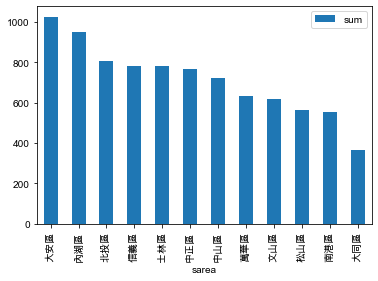

In [26]:
area10 = name_10n.groupby(['sarea'])
area10['tot'].aggregate(['sum']).sort_values(by = ['sum'], ascending = False).plot(kind = 'bar')

<AxesSubplot:xlabel='sarea'>

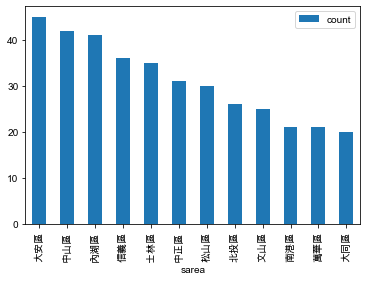

In [27]:
area10['sna'].aggregate(['count']).sort_values(by = ['count'], ascending = False).plot(kind = 'bar')

- 觀察全台北市 YouBike2.0 的車站數量，與整體可使用車位數量（篩掉已停用站點）

In [28]:
len(youbike_20['sna'].unique())

1056

In [29]:
name_20 = youbike_20.drop_duplicates(subset = ['sna'])
print(name_20.shape)
print(name_20['tot'].sum())

(1056, 17)
22028


In [30]:
name_20n = name_20[name_20['act'] == 1]
print(name_20n.shape)
print(name_20n['tot'].sum())

(1046, 17)
21864


<AxesSubplot:xlabel='sarea'>

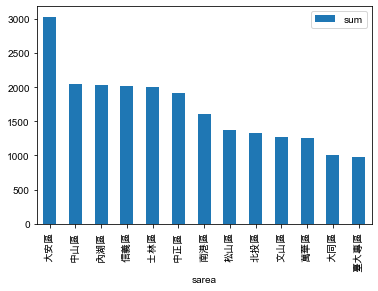

In [31]:
area20 = name_20n.groupby(['sarea'])
area20['tot'].aggregate(['sum']).sort_values(by = ['sum'], ascending = False).plot(kind = 'bar')

<AxesSubplot:xlabel='sarea'>

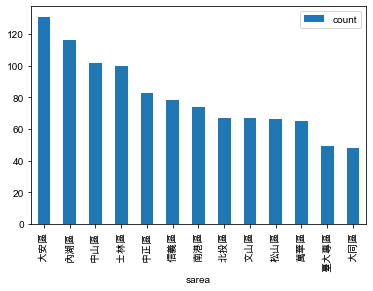

In [32]:
area20['sna'].aggregate(['count']).sort_values(by = ['count'], ascending = False).plot(kind = 'bar')
# 發現在臺大專區裡面的站點數量 > 大同區，但整體可用的自行車數量為大同區 > 臺大專區

- 從 YouBike1.0 中找出在台大總校區附近的站點
    - 從 YouBike官網而得：辛亥新生路口、捷運公館站(2號出口)、臺大資訊大樓、基隆長興路口

In [33]:
name_10n_list = name_10n['sna'].tolist()

if '辛亥新生路口' in name_10n_list:
    print('辛亥新生路口 in name_10n_list')
if '捷運公館站(2號出口)' in name_10n_list:
    print('捷運公館站(2號出口) in name_10n_list')
if '基隆長興路口' in name_10n_list:
    print('基隆長興路口 in name_10n_list')
if '臺大資訊大樓' in name_10n_list:
    print('臺大資訊大樓 in name_10n_list')

辛亥新生路口 in name_10n_list
捷運公館站(2號出口) in name_10n_list
基隆長興路口 in name_10n_list
臺大資訊大樓 in name_10n_list


In [34]:
ntu_10 = youbike_10n[(youbike_10n['sna'].isin(['辛亥新生路口', 
                                              '捷運公館站(2號出口)',  
                                              '臺大資訊大樓', 
                                              '基隆長興路口']))
                    & (youbike_10n['act'] == 1)]
print('ntu_10.shape', ntu_10.shape)
ntu_10

ntu_10.shape (4804, 17)


,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act,date,hour,minute
3008,30,基隆長興路口,26,17,大安區,2022-07-17 16:00:27,25.017054,121.544352,基隆路/長興街(東南側),Daan Dist.,Keelung & Changxing Intersection,The S.W side of Keelung Rd. & Changsing St.,9,1,2022-07-17,16,0
3009,31,辛亥新生路口,10,0,大安區,2022-07-17 16:00:15,25.022413,121.534560,辛亥路/新生南路(高架橋下),Daan Dist.,Xinhai & Xinsheng Intersection,Under the bridge- Sinhai Rd. & Shinsheng S. Rd.,10,1,2022-07-17,16,0
3014,36,臺大資訊大樓,72,12,大安區,2022-07-17 16:00:25,25.021010,121.541530,辛亥路二段(臺大外語學院外),Daan Dist.,NTU Information Bldg.,"Sec. 2, Xinghai Rd. (the outside ofLanguage Ce...",20,1,2022-07-17,16,0
3022,45,捷運公館站(2號出口),30,4,大安區,2022-07-17 16:00:27,25.014760,121.534538,羅斯福路四段/舟山路(東北側)(鄰近公館夜市),Daan Dist.,MRT Gongguan Sta.(Exit 2),The N.W. side of Roosevelt Rd.& Sinhai Rd.,26,1,2022-07-17,16,0
3381,30,基隆長興路口,26,17,大安區,2022-07-17 16:01:27,25.017054,121.544352,基隆路/長興街(東南側),Daan Dist.,Keelung & Changxing Intersection,The S.W side of Keelung Rd. & Changsing St.,9,1,2022-07-17,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
450197,45,捷運公館站(2號出口),30,26,大安區,2022-07-18 21:59:19,25.014760,121.534538,羅斯福路四段/舟山路(東北側)(鄰近公館夜市),Daan Dist.,MRT Gongguan Sta.(Exit 2),The N.W. side of Roosevelt Rd.& Sinhai Rd.,4,1,2022-07-18,21,59
450556,30,基隆長興路口,26,12,大安區,2022-07-18 22:00:37,25.017054,121.544352,基隆路/長興街(東南側),Daan Dist.,Keelung & Changxing Intersection,The S.W side of Keelung Rd. & Changsing St.,13,1,2022-07-18,22,0
450557,31,辛亥新生路口,10,6,大安區,2022-07-18 22:00:21,25.022413,121.534560,辛亥路/新生南路(高架橋下),Daan Dist.,Xinhai & Xinsheng Intersection,Under the bridge- Sinhai Rd. & Shinsheng S. Rd.,4,1,2022-07-18,22,0
450562,36,臺大資訊大樓,72,6,大安區,2022-07-18 22:00:27,25.021010,121.541530,辛亥路二段(臺大外語學院外),Daan Dist.,NTU Information Bldg.,"Sec. 2, Xinghai Rd. (the outside ofLanguage Ce...",26,1,2022-07-18,22,0


- 從 YouBike2.0 中找出在台大總校區附近的站點（包含校外與 YouBike1.0 相鄰地點）

    - 從 YouBike官網而得：辛亥新生路口東南側、臺大資訊大樓、基隆長興路口、捷運公館站(2號出口)

In [35]:
name_20n_list = name_20n['sna'].tolist()

if 'YouBike2.0_辛亥新生路口東南側' in name_20n_list:
    print('辛亥新生路口 in name_20n_list')
if 'YouBike2.0_捷運公館站(2號出口)' in name_20n_list:
    print('捷運公館站(2號出口) in name_20n_list')
if 'YouBike2.0_基隆長興路口' in name_20n_list:
    print('基隆長興路口 in name_20n_list')
if 'YouBike2.0_臺大資訊大樓' in name_20n_list:
    print('臺大資訊大樓 in name_10n_list')
    # 臺大資訊大樓沒有在2.0名單中

辛亥新生路口 in name_20n_list
捷運公館站(2號出口) in name_20n_list
基隆長興路口 in name_20n_list


In [36]:
test = youbike_20n[youbike_20n['ar'] == '臺大資訊大樓']
test
# 確認臺大資訊大樓沒有在2.0名單中

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act,date,hour,minute


In [37]:
ntu_20_1 = youbike_20n[youbike_20n['sarea'] == '臺大專區']
ntu_20_2 = youbike_20n[youbike_20n['sna'].isin(['YouBike2.0_辛亥新生路口東南側'
                                               , 'YouBike2.0_捷運公館站(2號出口)'
                                               , 'YouBike2.0_基隆長興路口'])]
print('ntu_20_1.shape', ntu_20_1.shape)
print('ntu_20_2.shape', ntu_20_2.shape)
ntu_20 = ntu_20_1.append(ntu_20_2)

ntu_20 = ntu_20[ntu_20['act'] == 1]
print('ntu_20.shape', ntu_20.shape)
ntu_20

ntu_20_1.shape (57516, 17)
ntu_20_2.shape (3603, 17)
ntu_20.shape (61119, 17)


,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act,date,hour,minute
8413,500119056,YouBike2.0_臺大農化新館西側,10,3,臺大專區,2022-07-17 16:00:27,25.01627,121.53535,臺大生化科技學系西側,NTU Dist,YouBike2.0_NTU New Agricultural Chemistry Buil...,NTU Department of Biochemical Science and Tech...,7,1,2022-07-17,16,0
8415,500119058,YouBike2.0_臺大舊體育館西側,33,21,臺大專區,2022-07-17 16:00:27,25.01980,121.53583,臺大田徑場東側,NTU Dist,YouBike2.0_NTU Gymnasium(West),NTU Sports Field(East),12,1,2022-07-17,16,0
8432,500119075,YouBike2.0_臺大第一活動中心西南側,40,38,臺大專區,2022-07-17 16:00:27,25.01761,121.53995,第一學生活動中心東南側,NTU Dist,YouBike2.0_NTU 1st Student Activity Center(Sou...,NTU 1st Student Activity Center(Southeast),2,1,2022-07-17,16,0
9454,500119005,YouBike2.0_臺大水源舍區A棟,37,23,臺大專區,2022-07-17 16:01:12,25.01493,121.53044,汀洲路三段60巷2弄路側(A舍北側),NTU Dist,YouBike2.0_NTU ShuiYuan Dorms(A),Aly. 2， Ln. 60， Sec. 3， Tingzhou Rd. Dorms A(N...,14,1,2022-07-17,16,1
9458,500119009,YouBike2.0_臺大水源舍區B棟,30,28,臺大專區,2022-07-17 16:01:37,25.01525,121.53009,汀洲路三段60巷2弄路側(B舍北側),NTU Dist,YouBike2.0_NTU ShuiYuan Dorms(B),Aly. 2， Ln. 60， Sec. 3， Tingzhou Rd. Dorms B(N...,2,1,2022-07-17,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1275569,500101041,YouBike2.0_辛亥新生路口東南側,41,15,大安區,2022-07-18 21:58:11,25.02218,121.53474,辛亥新生路口東南側,Daan Dist.,YouBike2.0_Xinhai Xinsheng Rd. Intersection (S...,Xinhai Xinsheng Rd. Intersection (Southeast),26,1,2022-07-18,21,58
1275655,500101193,YouBike2.0_基隆長興路口,43,9,大安區,2022-07-18 21:53:11,25.01705,121.54435,基隆路/長興街(東南側),Daan Dist.,YouBike2.0_Keelung Rd. & Changxing St. Interse...,Keelung Rd. & Changxing St. Intersection (Sout...,34,1,2022-07-18,21,53
1276711,500101193,YouBike2.0_基隆長興路口,43,9,大安區,2022-07-18 21:53:11,25.01705,121.54435,基隆路/長興街(東南側),Daan Dist.,YouBike2.0_Keelung Rd. & Changxing St. Interse...,Keelung Rd. & Changxing St. Intersection (Sout...,34,1,2022-07-18,21,53
1277767,500101193,YouBike2.0_基隆長興路口,43,9,大安區,2022-07-18 21:53:11,25.01705,121.54435,基隆路/長興街(東南側),Daan Dist.,YouBike2.0_Keelung Rd. & Changxing St. Interse...,Keelung Rd. & Changxing St. Intersection (Sout...,34,1,2022-07-18,21,53


In [38]:
ntu_all = ntu_10.append(ntu_20)
print('ntu_all.shape', ntu_all.shape)
ntu_all = ntu_all.reset_index(drop = True)
ntu_all

ntu_all.shape (65923, 17)


,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act,date,hour,minute
0,30,基隆長興路口,26,17,大安區,2022-07-17 16:00:27,25.017054,121.544352,基隆路/長興街(東南側),Daan Dist.,Keelung & Changxing Intersection,The S.W side of Keelung Rd. & Changsing St.,9,1,2022-07-17,16,0
1,31,辛亥新生路口,10,0,大安區,2022-07-17 16:00:15,25.022413,121.534560,辛亥路/新生南路(高架橋下),Daan Dist.,Xinhai & Xinsheng Intersection,Under the bridge- Sinhai Rd. & Shinsheng S. Rd.,10,1,2022-07-17,16,0
2,36,臺大資訊大樓,72,12,大安區,2022-07-17 16:00:25,25.021010,121.541530,辛亥路二段(臺大外語學院外),Daan Dist.,NTU Information Bldg.,"Sec. 2, Xinghai Rd. (the outside ofLanguage Ce...",20,1,2022-07-17,16,0
3,45,捷運公館站(2號出口),30,4,大安區,2022-07-17 16:00:27,25.014760,121.534538,羅斯福路四段/舟山路(東北側)(鄰近公館夜市),Daan Dist.,MRT Gongguan Sta.(Exit 2),The N.W. side of Roosevelt Rd.& Sinhai Rd.,26,1,2022-07-17,16,0
4,30,基隆長興路口,26,17,大安區,2022-07-17 16:01:27,25.017054,121.544352,基隆路/長興街(東南側),Daan Dist.,Keelung & Changxing Intersection,The S.W side of Keelung Rd. & Changsing St.,9,1,2022-07-17,16,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65918,500101041,YouBike2.0_辛亥新生路口東南側,41,15,大安區,2022-07-18 21:58:11,25.022180,121.534740,辛亥新生路口東南側,Daan Dist.,YouBike2.0_Xinhai Xinsheng Rd. Intersection (S...,Xinhai Xinsheng Rd. Intersection (Southeast),26,1,2022-07-18,21,58
65919,500101193,YouBike2.0_基隆長興路口,43,9,大安區,2022-07-18 21:53:11,25.017050,121.544350,基隆路/長興街(東南側),Daan Dist.,YouBike2.0_Keelung Rd. & Changxing St. Interse...,Keelung Rd. & Changxing St. Intersection (Sout...,34,1,2022-07-18,21,53
65920,500101193,YouBike2.0_基隆長興路口,43,9,大安區,2022-07-18 21:53:11,25.017050,121.544350,基隆路/長興街(東南側),Daan Dist.,YouBike2.0_Keelung Rd. & Changxing St. Interse...,Keelung Rd. & Changxing St. Intersection (Sout...,34,1,2022-07-18,21,53
65921,500101193,YouBike2.0_基隆長興路口,43,9,大安區,2022-07-18 21:53:11,25.017050,121.544350,基隆路/長興街(東南側),Daan Dist.,YouBike2.0_Keelung Rd. & Changxing St. Interse...,Keelung Rd. & Changxing St. Intersection (Sout...,34,1,2022-07-18,21,53


In [39]:
ntu_all = ntu_all.drop_duplicates()
ntu_all = ntu_all.reset_index(drop = True)
ntu_all.shape
# 清除重複值

(13527, 17)

In [40]:
ntu_all['date_hm'] = ntu_all.mday.dt.strftime('%Y-%m-%d %H:%M')
ntu_all['date_hm']
# 以「分」為單位之時間戳記以利接下來的分析

0        2022-07-17 16:00
1        2022-07-17 16:00
2        2022-07-17 16:00
3        2022-07-17 16:00
4        2022-07-17 16:01
               ...       
13522    2022-07-18 21:57
13523    2022-07-18 21:58
13524    2022-07-18 21:58
13525    2022-07-18 21:59
13526    2022-07-18 22:00
Name: date_hm, Length: 13527, dtype: object

In [41]:
ntu_all['date_h'] = ntu_all.mday.dt.strftime('%Y-%m-%d %H')
ntu_all['date_h']
# 以「小時」為單位之時間戳記以利接下來的分析

0        2022-07-17 16
1        2022-07-17 16
2        2022-07-17 16
3        2022-07-17 16
4        2022-07-17 16
             ...      
13522    2022-07-18 21
13523    2022-07-18 21
13524    2022-07-18 21
13525    2022-07-18 21
13526    2022-07-18 22
Name: date_h, Length: 13527, dtype: object

In [42]:
ntu_all['type'] = [ 0 for i in range(len(ntu_all))]

In [43]:
for i in range(len(ntu_all)):
    
    if ntu_all.loc[i, 'sna'].find('YouBike2.0') == -1:
        ntu_all.loc[i, 'type'] = 1
    
    else:
        ntu_all.loc[i, 'type'] = 2

In [44]:
name_ntu = ntu_all.drop_duplicates(subset = ['sna'])
print('len(name_ntu): ', len(name_ntu))
name_ntu['type'].value_counts()
# 1.0 共有 4站；2.0 共有 52站

len(name_ntu):  56


2    52
1     4
Name: type, dtype: int64

### 觀察台大 YouBike站點於 30 小時內的各場站空缺位置比例

- 以小時為單位進行分析
  
  - 由於是以「分鐘」為單位讀取資料，因此接下來都以整點 00分作為小時的定義

In [45]:
# YouBike 1.0
ntu_1 = ntu_all[ntu_all['type'] == 1]
ntu_1 = ntu_1[ntu_1['minute'] == 0]
ntu_1['date_hm'].value_counts().sort_index()

2022-07-17 16:00    4
2022-07-17 17:00    4
2022-07-17 18:00    4
2022-07-17 19:00    4
2022-07-17 20:00    4
2022-07-17 21:00    4
2022-07-18 01:00    4
2022-07-18 07:00    4
2022-07-18 10:00    4
2022-07-18 11:00    4
2022-07-18 12:00    4
2022-07-18 13:00    4
2022-07-18 14:00    4
2022-07-18 15:00    4
2022-07-18 16:00    4
2022-07-18 17:00    4
2022-07-18 18:00    4
2022-07-18 19:00    4
2022-07-18 21:00    4
2022-07-18 22:00    4
Name: date_hm, dtype: int64

In [46]:
def empty_ratio(bemp, tot):
    return round(bemp / tot, ndigits = 2)

In [47]:
ntu_1['empty_ratio'] = ntu_1.apply(lambda x: empty_ratio(x['bemp'], x['tot']), axis = 1)
ntu_1.head()

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,...,aren,bemp,act,date,hour,minute,date_hm,date_h,type,empty_ratio
0,30,基隆長興路口,26,17,大安區,2022-07-17 16:00:27,25.017054,121.544352,基隆路/長興街(東南側),Daan Dist.,...,The S.W side of Keelung Rd. & Changsing St.,9,1,2022-07-17,16,0,2022-07-17 16:00,2022-07-17 16,1,0.35
1,31,辛亥新生路口,10,0,大安區,2022-07-17 16:00:15,25.022413,121.534560,辛亥路/新生南路(高架橋下),Daan Dist.,...,Under the bridge- Sinhai Rd. & Shinsheng S. Rd.,10,1,2022-07-17,16,0,2022-07-17 16:00,2022-07-17 16,1,1.00
2,36,臺大資訊大樓,72,12,大安區,2022-07-17 16:00:25,25.021010,121.541530,辛亥路二段(臺大外語學院外),Daan Dist.,...,"Sec. 2, Xinghai Rd. (the outside ofLanguage Ce...",20,1,2022-07-17,16,0,2022-07-17 16:00,2022-07-17 16,1,0.28
3,45,捷運公館站(2號出口),30,4,大安區,2022-07-17 16:00:27,25.014760,121.534538,羅斯福路四段/舟山路(東北側)(鄰近公館夜市),Daan Dist.,...,The N.W. side of Roosevelt Rd.& Sinhai Rd.,26,1,2022-07-17,16,0,2022-07-17 16:00,2022-07-17 16,1,0.87
223,30,基隆長興路口,26,19,大安區,2022-07-17 17:00:28,25.017054,121.544352,基隆路/長興街(東南側),Daan Dist.,...,The S.W side of Keelung Rd. & Changsing St.,7,1,2022-07-17,17,0,2022-07-17 17:00,2022-07-17 17,1,0.27


<AxesSubplot:xlabel='date_hm'>

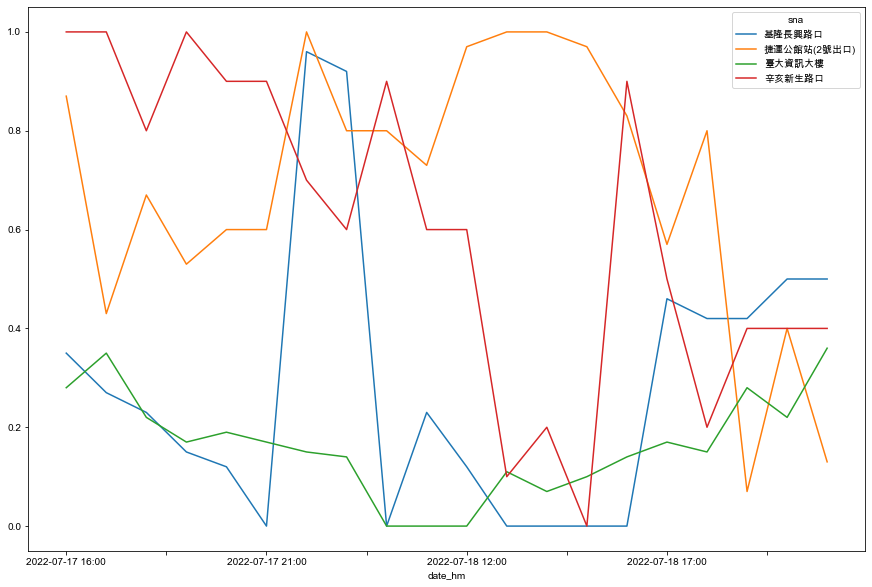

In [48]:
ntu_1_g = ntu_1
pd.pivot_table(ntu_1_g.reset_index(),
              index = 'date_hm', columns = 'sna', values = 'empty_ratio'
              ).plot(legend = True, figsize = (15, 10))

In [49]:
# YouBike 2.0
ntu_2 = ntu_all[ntu_all['type'] == 2]
ntu_2 = ntu_2[ntu_2['minute'] == 0]
ntu_2['date_hm'].value_counts().sort_index()
# 發現 YouBike2.0 在導入資料時可能有漏資料的問題

2022-07-17 16:00     5
2022-07-17 17:00     5
2022-07-17 18:00     4
2022-07-17 19:00     6
2022-07-17 20:00     5
2022-07-17 21:00     4
2022-07-17 22:00     1
2022-07-17 23:00     1
2022-07-18 07:00     5
2022-07-18 10:00    13
2022-07-18 11:00    10
2022-07-18 12:00    13
2022-07-18 13:00     9
2022-07-18 14:00    11
2022-07-18 15:00    11
2022-07-18 16:00    11
2022-07-18 17:00     3
2022-07-18 18:00    10
2022-07-18 19:00     4
2022-07-18 20:00     1
2022-07-18 21:00     4
2022-07-18 22:00     6
Name: date_hm, dtype: int64

In [50]:
test = ntu_2[ntu_2['date_hm'] == '2022/07/18 10:00']
test['sna'].value_counts()

Series([], Name: sna, dtype: int64)

In [51]:
test = ntu_2[ntu_2['date_hm'] == '2022/07/18 17:00']
test['sna'].value_counts()
# 發現針對 YouBike2.0 如果以某小時的 00分作為單位進行分析，會有資料缺漏的問題

Series([], Name: sna, dtype: int64)

- 以分鐘為單位進行分析

In [52]:
# YouBike2.0
ntu_2 = ntu_all[ntu_all['type'] == 2]
ntu_2['date_hm'].value_counts().sort_index()

2022-07-17 16:00    5
2022-07-17 16:01    7
2022-07-17 16:02    7
2022-07-17 16:03    8
2022-07-17 16:04    4
                   ..
2022-07-18 21:56    5
2022-07-18 21:57    5
2022-07-18 21:58    5
2022-07-18 21:59    4
2022-07-18 22:00    6
Name: date_hm, Length: 1340, dtype: int64

In [53]:
ntu_2['date_hm'].value_counts().sort_values()

2022-07-18 09:21     1
2022-07-18 08:15     1
2022-07-17 21:21     1
2022-07-18 09:05     1
2022-07-17 21:20     1
                    ..
2022-07-18 18:09    18
2022-07-18 17:25    18
2022-07-18 18:12    18
2022-07-18 11:59    19
2022-07-18 12:39    19
Name: date_hm, Length: 1340, dtype: int64

- 發現資料仍然有缺漏的問題，回去檢查.json檔發現在 YouBike2.0中有個欄位為 "updateTime"
- 而該欄位在 YouBike2.0即時資料中才真的代表每分鐘更新到.json檔的時間
- 但資料庫僅有 mday作為場站更新資料時間作為參考，因此若以分鐘為單位會有些場站沒有提供更新資料的時間
- 解法：同時也因為 YouBike1.0資料集中只有 "mday" 欄位，因此接下來仍然以 "mday" 進行分析

In [54]:
ntu_2['empty_ratio'] = ntu_2.apply(lambda x: empty_ratio(x['bemp'], x['tot']), axis = 1)
ntu_2.head()

/Users/ct/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,...,aren,bemp,act,date,hour,minute,date_hm,date_h,type,empty_ratio
4721,500119056,YouBike2.0_臺大農化新館西側,10,3,臺大專區,2022-07-17 16:00:27,25.01627,121.53535,臺大生化科技學系西側,NTU Dist,...,NTU Department of Biochemical Science and Tech...,7,1,2022-07-17,16,0,2022-07-17 16:00,2022-07-17 16,2,0.70
4722,500119058,YouBike2.0_臺大舊體育館西側,33,21,臺大專區,2022-07-17 16:00:27,25.01980,121.53583,臺大田徑場東側,NTU Dist,...,NTU Sports Field(East),12,1,2022-07-17,16,0,2022-07-17 16:00,2022-07-17 16,2,0.36
4723,500119075,YouBike2.0_臺大第一活動中心西南側,40,38,臺大專區,2022-07-17 16:00:27,25.01761,121.53995,第一學生活動中心東南側,NTU Dist,...,NTU 1st Student Activity Center(Southeast),2,1,2022-07-17,16,0,2022-07-17 16:00,2022-07-17 16,2,0.05
4724,500119005,YouBike2.0_臺大水源舍區A棟,37,23,臺大專區,2022-07-17 16:01:12,25.01493,121.53044,汀洲路三段60巷2弄路側(A舍北側),NTU Dist,...,Aly. 2， Ln. 60， Sec. 3， Tingzhou Rd. Dorms A(N...,14,1,2022-07-17,16,1,2022-07-17 16:01,2022-07-17 16,2,0.38
4725,500119009,YouBike2.0_臺大水源舍區B棟,30,28,臺大專區,2022-07-17 16:01:37,25.01525,121.53009,汀洲路三段60巷2弄路側(B舍北側),NTU Dist,...,Aly. 2， Ln. 60， Sec. 3， Tingzhou Rd. Dorms B(N...,2,1,2022-07-17,16,1,2022-07-17 16:01,2022-07-17 16,2,0.07


In [55]:
ntu_2_g = ntu_2
pd.pivot_table(ntu_2_g.reset_index(),
              index = 'date_hm', columns = 'sna', values = 'empty_ratio'
              ).isna().sum().sort_values()
# 由於在 YouBike2.0 中，"mday"代表場站更新時間
# 因此若資料集紀錄的空值越少，代表更新頻率越高 --> 場地使用率高

sna
YouBike2.0_捷運公館站(2號出口)     437
YouBike2.0_臺大第一活動中心西南側     968
YouBike2.0_臺大社科院西側         999
YouBike2.0_臺大新體育館東南側      1026
YouBike2.0_臺大小福樓東側        1055
YouBike2.0_臺大工綜館南側        1065
YouBike2.0_臺大博理館西側        1073
YouBike2.0_臺大水源舍區B棟       1088
YouBike2.0_臺大水源舍區A棟       1096
YouBike2.0_臺大椰林小舖         1100
YouBike2.0_臺大社會系館南側       1103
YouBike2.0_臺大農業陳列館北側      1105
YouBike2.0_臺大天文數學館南側      1111
YouBike2.0_臺大鹿鳴堂東側        1116
YouBike2.0_辛亥新生路口東南側      1135
YouBike2.0_臺大凝態館南側        1136
YouBike2.0_臺大舊體育館西側       1137
YouBike2.0_臺大計資中心南側       1157
YouBike2.0_臺大電機二館東南側      1164
YouBike2.0_臺大總圖書館西南側      1165
YouBike2.0_臺大生命科學館西北側     1169
YouBike2.0_臺大心理系館南側       1176
YouBike2.0_臺大黑森林西側        1188
YouBike2.0_臺大一號館          1191
YouBike2.0_臺大新生教室南側       1194
YouBike2.0_臺大教研館北側        1195
YouBike2.0_臺大卓越研究大樓       1204
YouBike2.0_臺大水源修齊會館       1205
YouBike2.0_臺大明達館機車停車場     1206
YouBike2.0_臺大鄭江樓北側        1211
YouBike2.0_臺大農化新館西側       1215
YouBike2.0_臺大樂學館東側        1217
YouB

In [56]:
# 每小時的平均呢？
ntu_2 = ntu_2.reset_index(drop = True)
ntu_2.groupby('date_h')['sna'].nunique()

date_h
2022-07-17 16    46
2022-07-17 17    46
2022-07-17 18    46
2022-07-17 19    43
2022-07-17 20    38
2022-07-17 21    33
2022-07-17 22    28
2022-07-17 23    34
2022-07-18 00    17
2022-07-18 01    21
2022-07-18 02     9
2022-07-18 03     8
2022-07-18 04     1
2022-07-18 05    10
2022-07-18 06    34
2022-07-18 07    48
2022-07-18 08     8
2022-07-18 09    49
2022-07-18 10    48
2022-07-18 11    50
2022-07-18 12    51
2022-07-18 13    51
2022-07-18 14    52
2022-07-18 15    48
2022-07-18 16    48
2022-07-18 17    50
2022-07-18 18    49
2022-07-18 19    44
2022-07-18 20    43
2022-07-18 21    38
2022-07-18 22     6
Name: sna, dtype: int64

In [57]:
import numpy as np
ntu_2_pvt = ntu_2.pivot_table(values = 'empty_ratio',
                             index = 'sna',
                             columns = 'date_h',
                             aggfunc = np.mean,
                             margins = True)
ntu_2_pvt.sort_values(by = 'All', ascending = False)

date_h,2022-07-17 16,2022-07-17 17,2022-07-17 18,2022-07-17 19,2022-07-17 20,2022-07-17 21,2022-07-17 22,2022-07-17 23,2022-07-18 00,2022-07-18 01,...,2022-07-18 14,2022-07-18 15,2022-07-18 16,2022-07-18 17,2022-07-18 18,2022-07-18 19,2022-07-18 20,2022-07-18 21,2022-07-18 22,All
sna,,,,,,,,,,,,,,,,,,,,,
YouBike2.0_臺大第二行政大樓南側,0.950000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.918182,0.875000,0.942857,0.950000,0.966667,NaN,0.900000,NaN,NaN,0.924658
YouBike2.0_臺大共同教室東南側,0.937500,0.884000,1.000000,NaN,NaN,NaN,0.9600,NaN,NaN,NaN,...,0.906000,0.905714,0.903333,0.937500,0.960000,0.886667,NaN,NaN,NaN,0.915743
YouBike2.0_臺大小小福西南側,NaN,NaN,NaN,NaN,NaN,NaN,0.8000,1.000000,NaN,NaN,...,0.850000,NaN,NaN,NaN,0.866667,NaN,0.900000,0.850000,NaN,0.900000
YouBike2.0_臺大共同教室北側,0.800000,NaN,0.983333,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,...,0.975000,1.000000,0.975000,0.975000,0.983333,NaN,0.350000,0.450000,NaN,0.890714
YouBike2.0_臺大管理學院二館北側,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.925000,0.775000,0.640000,0.685000,0.970000,NaN,NaN,NaN,NaN,0.890541
YouBike2.0_臺大檔案展示館,1.000000,0.900000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.600000,NaN,0.733333,0.750000,NaN,0.925000,NaN,NaN,NaN,0.880000
YouBike2.0_臺大二號館,0.900000,0.966667,NaN,0.900000,0.600000,0.833333,NaN,NaN,0.600000,NaN,...,0.950000,0.900000,0.750000,0.942857,0.914286,0.966667,0.900000,1.000000,NaN,0.877778
YouBike2.0_臺大博雅館西側,0.860000,0.803333,0.826667,0.860000,NaN,NaN,NaN,NaN,NaN,NaN,...,0.850000,0.840000,NaN,NaN,0.840000,NaN,0.866667,0.958000,NaN,0.875278
YouBike2.0_臺大禮賢樓東南側,0.986667,0.943333,0.935000,0.986667,NaN,NaN,NaN,NaN,NaN,NaN,...,0.957500,0.832500,0.806154,0.933846,0.980000,0.538000,0.367500,0.463333,NaN,0.857833


In [58]:
ntu_2_pvt = ntu_2.pivot_table(values = 'empty_ratio',
                             index = 'date_h',
                             columns = 'sna',
                             aggfunc = np.mean,
                             margins = True)
ntu_2_pvt.isna().sum().sort_values(ascending = False)

sna
YouBike2.0_臺大管理學院二館北側     21
YouBike2.0_臺大小小福西南側       19
YouBike2.0_臺大第二行政大樓南側     18
YouBike2.0_臺大原分所北側        17
YouBike2.0_臺大四號館東北側       17
YouBike2.0_臺大檔案展示館        17
YouBike2.0_臺大博雅館西側        16
YouBike2.0_臺大共同教室北側       15
YouBike2.0_臺大共同教室東南側      15
YouBike2.0_臺大圖資系館北側       14
YouBike2.0_臺大計資中心南側       14
YouBike2.0_臺大森林館北側        13
YouBike2.0_臺大五號館西側        13
YouBike2.0_臺大公館停車場西北側     12
YouBike2.0_臺大禮賢樓東南側       12
YouBike2.0_臺大獸醫館南側        12
YouBike2.0_臺大二號館          11
YouBike2.0_臺大鹿鳴堂東側        11
YouBike2.0_臺大社會系館南側       11
YouBike2.0_臺大思亮館東南側       11
YouBike2.0_臺大農化新館西側       10
YouBike2.0_臺大新生教室南側       10
YouBike2.0_臺大新體育館東南側      10
YouBike2.0_臺大第一活動中心西南側     9
YouBike2.0_臺大立體機車停車場       9
YouBike2.0_基隆長興路口          9
YouBike2.0_臺大教研館北側         9
YouBike2.0_臺大凝態館南側         9
YouBike2.0_臺大土木系館          9
YouBike2.0_臺大天文數學館南側       8
YouBike2.0_臺大博理館西側         8
YouBike2.0_臺大樂學館東側         8
YouBike2.0_臺大明達館機車停車場      8
YouBike2.0_臺大電機二館東南側       8
YouBike2.0

- 由於 YouBike2.0 中，若場站有資料進行更新時會將時間戳記更新在 "mday" 中，因此以 "mday" 作為場站使用頻率的依據，若當中的空值太多則表示該時段並沒有使用跡象
    - 因此將前十名最多人使用的場站之 empty_ratio 作為選擇接下來欲研究的站點
        - YouBike2.0_臺大卓越研究大樓: 0.598235
        - YouBike2.0_捷運公館站(2號出口): 0.695407
        - YouBike2.0_臺大椰林小舖: 0.596557
        - YouBike2.0_臺大小福樓東側: 0.427365
        - YouBike2.0_臺大水源舍區A棟: 0.518163
        - YouBike2.0_臺大水源舍區B棟: 0.537905
        - YouBike2.0_臺大社科院西側: 0.507464
        - YouBike2.0_辛亥新生路口東南側: 0.819903
        - YouBike2.0_臺大舊體育館西側: 0.561317
    - 接下來將選擇 YouBike2.0_捷運公館站(2號出口) 進行分析


In [59]:
# YouBike1.0
ntu_1 = ntu_all[ntu_all['type'] == 1]
ntu_1['date_hm'].value_counts().sort_index()

2022-07-17 16:00    4
2022-07-17 16:01    4
2022-07-17 16:02    4
2022-07-17 16:03    4
2022-07-17 16:04    4
                   ..
2022-07-18 21:56    4
2022-07-18 21:57    4
2022-07-18 21:58    4
2022-07-18 21:59    4
2022-07-18 22:00    4
Name: date_hm, Length: 1185, dtype: int64

In [60]:
ntu_1['empty_ratio'] = ntu_1.apply(lambda x: empty_ratio(x['bemp'], x['tot']), axis = 1)
ntu_1.head()

/Users/ct/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,...,aren,bemp,act,date,hour,minute,date_hm,date_h,type,empty_ratio
0,30,基隆長興路口,26,17,大安區,2022-07-17 16:00:27,25.017054,121.544352,基隆路/長興街(東南側),Daan Dist.,...,The S.W side of Keelung Rd. & Changsing St.,9,1,2022-07-17,16,0,2022-07-17 16:00,2022-07-17 16,1,0.35
1,31,辛亥新生路口,10,0,大安區,2022-07-17 16:00:15,25.022413,121.534560,辛亥路/新生南路(高架橋下),Daan Dist.,...,Under the bridge- Sinhai Rd. & Shinsheng S. Rd.,10,1,2022-07-17,16,0,2022-07-17 16:00,2022-07-17 16,1,1.00
2,36,臺大資訊大樓,72,12,大安區,2022-07-17 16:00:25,25.021010,121.541530,辛亥路二段(臺大外語學院外),Daan Dist.,...,"Sec. 2, Xinghai Rd. (the outside ofLanguage Ce...",20,1,2022-07-17,16,0,2022-07-17 16:00,2022-07-17 16,1,0.28
3,45,捷運公館站(2號出口),30,4,大安區,2022-07-17 16:00:27,25.014760,121.534538,羅斯福路四段/舟山路(東北側)(鄰近公館夜市),Daan Dist.,...,The N.W. side of Roosevelt Rd.& Sinhai Rd.,26,1,2022-07-17,16,0,2022-07-17 16:00,2022-07-17 16,1,0.87
4,30,基隆長興路口,26,17,大安區,2022-07-17 16:01:27,25.017054,121.544352,基隆路/長興街(東南側),Daan Dist.,...,The S.W side of Keelung Rd. & Changsing St.,9,1,2022-07-17,16,1,2022-07-17 16:01,2022-07-17 16,1,0.35


<AxesSubplot:xlabel='date_hm'>

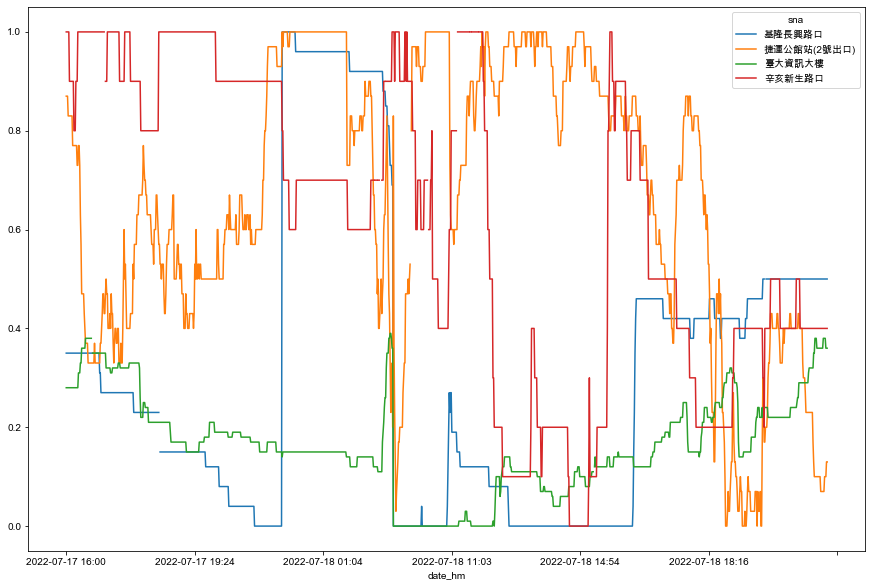

In [61]:
ntu_1_g = ntu_1
pd.pivot_table(ntu_1_g.reset_index(),
              index = 'date_hm', columns = 'sna', values = 'empty_ratio'
              ).plot(legend = True, figsize = (15, 10))
# 從下表可看出在以分鐘為單位觀察時的 YouBike1.0 空站率
# 雖然有部分資料遺失，但仍可看出空佔率最高且頻率最高的站點為「捷運公館站(2號出口)」、「辛亥新生路口」

In [62]:
ntu_1 = ntu_1.reset_index(drop = True)
ntu_1.groupby('date_h')['sna'].nunique()

date_h
2022-07-17 16    4
2022-07-17 17    4
2022-07-17 18    4
2022-07-17 19    4
2022-07-17 20    4
2022-07-17 21    4
2022-07-17 22    4
2022-07-17 23    4
2022-07-18 00    4
2022-07-18 01    4
2022-07-18 02    4
2022-07-18 03    4
2022-07-18 04    4
2022-07-18 05    4
2022-07-18 06    4
2022-07-18 07    4
2022-07-18 09    4
2022-07-18 10    4
2022-07-18 11    4
2022-07-18 12    4
2022-07-18 13    4
2022-07-18 14    4
2022-07-18 15    4
2022-07-18 16    4
2022-07-18 17    4
2022-07-18 18    4
2022-07-18 19    4
2022-07-18 20    4
2022-07-18 21    4
2022-07-18 22    4
Name: sna, dtype: int64

In [63]:
ntu_1_pvt = ntu_1.pivot_table(values = 'empty_ratio',
                             index = 'sna',
                             columns = 'date_h',
                             aggfunc = np.mean,
                             margins = True)
ntu_1_pvt.sort_values(by = 'All', ascending = False)

date_h,2022-07-17 16,2022-07-17 17,2022-07-17 18,2022-07-17 19,2022-07-17 20,2022-07-17 21,2022-07-17 22,2022-07-17 23,2022-07-18 00,2022-07-18 01,...,2022-07-18 14,2022-07-18 15,2022-07-18 16,2022-07-18 17,2022-07-18 18,2022-07-18 19,2022-07-18 20,2022-07-18 21,2022-07-18 22,All
sna,,,,,,,,,,,,,,,,,,,,,
捷運公館站(2號出口),0.542500,0.454333,0.590667,0.483167,0.592000,0.836250,1.000,0.99400,1.000000,1.0000,...,0.926333,0.886000,0.750000,0.666833,0.352500,0.04325,0.352000,0.251667,0.1300,0.664341
辛亥新生路口,0.971429,0.954237,0.906667,0.995000,0.900000,0.900000,0.800,0.65500,0.697436,0.7000,...,0.120000,0.430000,0.682759,0.413333,0.220000,0.40000,0.427500,0.410000,0.4000,0.621124
All,0.548251,0.497071,0.474393,0.447583,0.431500,0.473938,0.735,0.69975,0.701859,0.7025,...,0.279792,0.359916,0.470517,0.422563,0.311667,0.26475,0.374177,0.367125,0.3475,0.439915
基隆長興路口,0.345714,0.262667,0.189322,0.140500,0.050667,0.000000,1.000,1.00000,0.960000,0.9600,...,0.000000,0.000000,0.313966,0.419310,0.424000,0.43500,0.500000,0.500000,0.5000,0.310585
臺大資訊大樓,0.329455,0.324667,0.206167,0.171667,0.183333,0.159500,0.140,0.15000,0.150000,0.1500,...,0.072833,0.119661,0.135345,0.190667,0.250167,0.18075,0.223500,0.306833,0.3600,0.164472


<AxesSubplot:xlabel='date_h'>

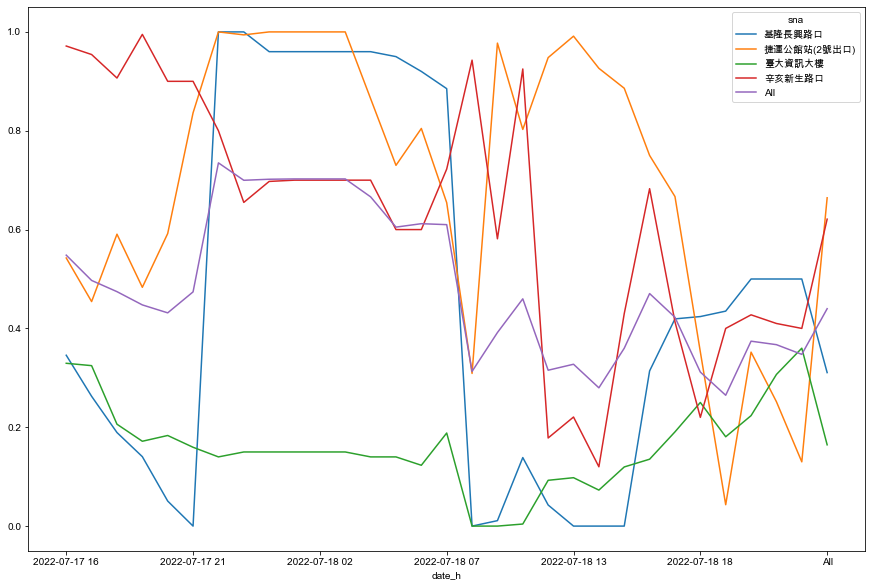

In [64]:
ntu_1.pivot_table(values = 'empty_ratio',
                             index = 'date_h',
                             columns = 'sna',
                             #aggfunc = np.mean,
                             margins = True).plot(legend = True, figsize = (15, 10))

- 觀察 YouBike1.0 資料也發現到捷運公館站(2號出口)的 empty_ratio 也高達 0.664341
- 因此接下來的目標即是分析捷運公館站(2號出口)是否需要提高補車頻率

### 捷運公館站(2號出口)
- 想先分析在哪個時間點的空站率（empty_ratio）最高
- 觀察 YouBike2.0 與 YouBike1.0 的使用程度

In [65]:
mrt_kk1 = ntu_all[ntu_all['sna'] == 'YouBike2.0_捷運公館站(2號出口)']
mrt_kk2 = ntu_all[ntu_all['sna'] == '捷運公館站(2號出口)']
mrt_kk = mrt_kk1.append(mrt_kk2)
mrt_kk = mrt_kk.reset_index(drop = True)
print('mrt_kk.shape:', mrt_kk.shape)
mrt_kk.head()

mrt_kk.shape: (2131, 20)


,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act,date,hour,minute,date_hm,date_h,type
0,500101022,YouBike2.0_捷運公館站(2號出口),99,10,大安區,2022-07-17 16:00:26,25.01491,121.53438,捷運公館站(2號出口)外側,Daan Dist.,YouBike2.0_MRT Gongguan Sta. (Exit 2),MRT Gongguan Sta. (Exit 2),89,1,2022-07-17,16,0,2022-07-17 16:00,2022-07-17 16,2
1,500101022,YouBike2.0_捷運公館站(2號出口),99,11,大安區,2022-07-17 16:01:12,25.01491,121.53438,捷運公館站(2號出口)外側,Daan Dist.,YouBike2.0_MRT Gongguan Sta. (Exit 2),MRT Gongguan Sta. (Exit 2),88,1,2022-07-17,16,1,2022-07-17 16:01,2022-07-17 16,2
2,500101022,YouBike2.0_捷運公館站(2號出口),99,11,大安區,2022-07-17 16:02:38,25.01491,121.53438,捷運公館站(2號出口)外側,Daan Dist.,YouBike2.0_MRT Gongguan Sta. (Exit 2),MRT Gongguan Sta. (Exit 2),88,1,2022-07-17,16,2,2022-07-17 16:02,2022-07-17 16,2
3,500101022,YouBike2.0_捷運公館站(2號出口),99,11,大安區,2022-07-17 16:04:37,25.01491,121.53438,捷運公館站(2號出口)外側,Daan Dist.,YouBike2.0_MRT Gongguan Sta. (Exit 2),MRT Gongguan Sta. (Exit 2),88,1,2022-07-17,16,4,2022-07-17 16:04,2022-07-17 16,2
4,500101022,YouBike2.0_捷運公館站(2號出口),99,9,大安區,2022-07-17 16:05:11,25.01491,121.53438,捷運公館站(2號出口)外側,Daan Dist.,YouBike2.0_MRT Gongguan Sta. (Exit 2),MRT Gongguan Sta. (Exit 2),90,1,2022-07-17,16,5,2022-07-17 16:05,2022-07-17 16,2


In [66]:
# YouBike1.0 在捷運公館站共有 30總車位
# YouBike2.0 在捷運公館站共有 99總車位
print(mrt_kk['type'].value_counts())
print(mrt_kk['tot'].value_counts())

1    1184
2     947
Name: type, dtype: int64
30    1184
99     947
Name: tot, dtype: int64


In [67]:
mrt_kk['empty_ratio'] = mrt_kk.apply(lambda x: empty_ratio(x['bemp'], x['tot']), axis = 1)
mrt_kk.head()

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,...,aren,bemp,act,date,hour,minute,date_hm,date_h,type,empty_ratio
0,500101022,YouBike2.0_捷運公館站(2號出口),99,10,大安區,2022-07-17 16:00:26,25.01491,121.53438,捷運公館站(2號出口)外側,Daan Dist.,...,MRT Gongguan Sta. (Exit 2),89,1,2022-07-17,16,0,2022-07-17 16:00,2022-07-17 16,2,0.90
1,500101022,YouBike2.0_捷運公館站(2號出口),99,11,大安區,2022-07-17 16:01:12,25.01491,121.53438,捷運公館站(2號出口)外側,Daan Dist.,...,MRT Gongguan Sta. (Exit 2),88,1,2022-07-17,16,1,2022-07-17 16:01,2022-07-17 16,2,0.89
2,500101022,YouBike2.0_捷運公館站(2號出口),99,11,大安區,2022-07-17 16:02:38,25.01491,121.53438,捷運公館站(2號出口)外側,Daan Dist.,...,MRT Gongguan Sta. (Exit 2),88,1,2022-07-17,16,2,2022-07-17 16:02,2022-07-17 16,2,0.89
3,500101022,YouBike2.0_捷運公館站(2號出口),99,11,大安區,2022-07-17 16:04:37,25.01491,121.53438,捷運公館站(2號出口)外側,Daan Dist.,...,MRT Gongguan Sta. (Exit 2),88,1,2022-07-17,16,4,2022-07-17 16:04,2022-07-17 16,2,0.89
4,500101022,YouBike2.0_捷運公館站(2號出口),99,9,大安區,2022-07-17 16:05:11,25.01491,121.53438,捷運公館站(2號出口)外側,Daan Dist.,...,MRT Gongguan Sta. (Exit 2),90,1,2022-07-17,16,5,2022-07-17 16:05,2022-07-17 16,2,0.91


<AxesSubplot:xlabel='date_h'>

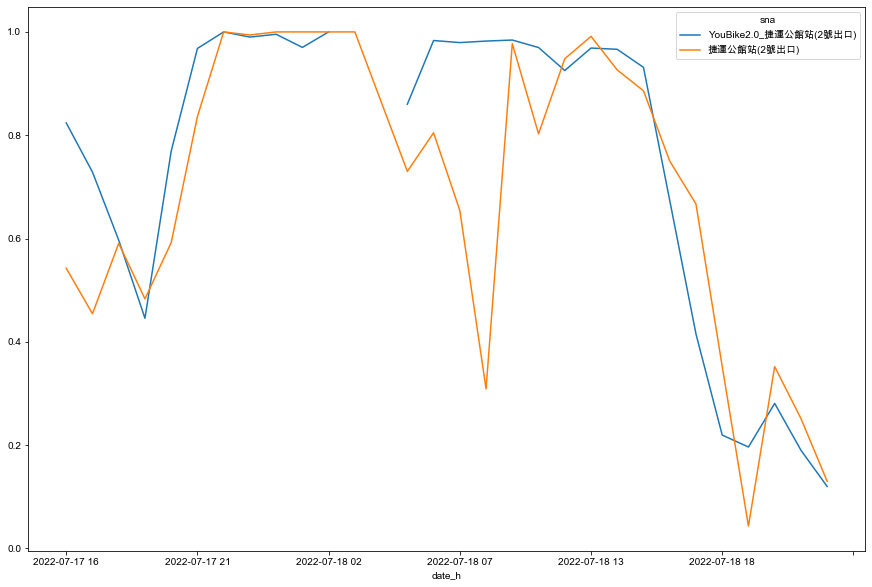

In [68]:
mrt_kk.pivot_table(values = 'empty_ratio',
                             index = 'date_h',
                             columns = 'sna'
                    ).plot(legend = True, figsize = (15, 10))
# 需注意到的是 YouBike2.0 在 2022-07-17 03~04這個區間並沒有任何資料更新

- 發現 2022-07-17 16 ~ 19 及 2022-07-18 06 ~ 08 這兩個時段 YouBike2.0 與 1.0 空站率的差幅最大
- YouBike1.0 在 2022-07-17 22~ 2022-07-18 03 的空站率漸進 100%
- YouBike2.0 在 2022-07-17 22~ 2022-07-18 02 與 2022-07-18 07~15 空站率漸進 100%
- YouBike2.0 在 2022-07-17 19~21 有較 YouBike1.0 早「提高」空站率的現象
- YouBike2.0 在 2022-07-17 15~18 有較 YouBike1.0 早「降低」空站率的現象

In [69]:
mrt_kk2 = mrt_kk[mrt_kk['type'] == 2]
mrt_kk2_pvt = mrt_kk2.pivot_table(values = 'empty_ratio',
                             index = 'date_h',
                             )
mrt_kk2_pvt
# mrt_kk2_pvt.reindex(mrt_kk2_pvt['empty_ratio'].sort_values(ascending = False).index)
# 在 2022-07-17 21~ 2022-07-18 02時有兩次 100%的空站率
# 在 2022-07-18 07~15 有大於 90% 的空站率

,empty_ratio
date_h,
2022-07-17 16,0.823800
2022-07-17 17,0.728571
2022-07-17 18,0.596852
2022-07-17 19,0.445625
2022-07-17 20,0.769245
2022-07-17 21,0.968000
2022-07-17 22,1.000000
2022-07-17 23,0.990000
2022-07-18 00,0.995455


In [70]:
mrt_kk1 = mrt_kk[mrt_kk['type'] == 1]
mrt_kk1_pvt = mrt_kk1.pivot_table(values = 'empty_ratio',
                             index = 'date_h',
                             )
mrt_kk1_pvt
# mrt_kk2_pvt.reindex(mrt_kk2_pvt['empty_ratio'].sort_values(ascending = False).index)
# 在 2022-07-17 22~ 2022-07-18 03時有五次 100%的空站率
# 在 2022-07-18 12~14 有大於 90% 的空站率

,empty_ratio
date_h,
2022-07-17 16,0.542500
2022-07-17 17,0.454333
2022-07-17 18,0.590667
2022-07-17 19,0.483167
2022-07-17 20,0.592000
2022-07-17 21,0.836250
2022-07-17 22,1.000000
2022-07-17 23,0.994000
2022-07-18 00,1.000000


In [71]:
# 發現 2022-07-17 16 ~ 19 及 2022-07-18 06 ~ 08 這兩個時段 YouBike2.0 與 1.0 空站率的差幅最大
mrt_kk_pvt = mrt_kk.pivot_table(values = 'empty_ratio',
                                columns = 'type',
                                 index = 'date_h',
                                )
mrt_kk_df = mrt_kk_pvt.reset_index(level = 'date_h')
mrt_kk_df = mrt_kk_df.fillna(0)
mrt_kk_df['difference'] = [None for i in range(len(mrt_kk_df))]

for i in range(len(mrt_kk_df)):
    if mrt_kk_df.loc[i, 2] != 0.0:
        mrt_kk_df.loc[i, 'difference'] = mrt_kk_df.loc[i, 1] - mrt_kk_df.loc[i, 2]

In [72]:
mrt_kk_df.sort_values(by = 'difference')
# 早上時段 2022-07-18 06, 07, 09 有最大的差幅，可看出此時 YouBike2.0 的空站率遠高於 YouBike1.0
# 下午時段 2022-07-17 16, 17 差幅大於 25% YouBike2.0 的空站率較高
# 下午時段 2022-07-18 17, 18 差幅介於 13%~25% 之間，此時的 YouBike1.0 空站率較高

type,date_h,1,2,difference
16,2022-07-18 09,0.308889,0.982273,-0.673384
15,2022-07-18 07,0.654444,0.979318,-0.324874
0,2022-07-17 16,0.542500,0.823800,-0.2813
1,2022-07-17 17,0.454333,0.728571,-0.274238
14,2022-07-18 06,0.804615,0.983333,-0.178718
4,2022-07-17 20,0.592000,0.769245,-0.177245
18,2022-07-18 11,0.802667,0.969792,-0.167125
26,2022-07-18 19,0.043250,0.196364,-0.153114
5,2022-07-17 21,0.836250,0.968000,-0.13175
13,2022-07-18 05,0.730000,0.860000,-0.13


- YouBike2.0
    - 在 2022-07-17 21~ 2022-07-18 02時有兩次 100%的空站率
    - 在 2022-07-18 07~15 有大於 90% 的空站率
    - 在 2022-07-17 19~21 有較 YouBike1.0 早「提高」空站率的現象
    - 在 2022-07-17 15~18 有較 YouBike1.0 早「降低」空站率的現象
- YouBike1.0
    - 在 2022-07-17 22~ 2022-07-18 03時有五次 100%的空站率
    - 在 2022-07-18 12~14 有大於 90% 的空站率
- 早上時段
    - 2022-07-18 06, 07, 09 有最大的差幅，可看出此時 YouBike2.0 的空站率遠高於 YouBike1.0
- 下午時段
    - 2022-07-17 16, 17 差幅大於 25% YouBike2.0 的空站率較高
    - 2022-07-18 17, 18 差幅介於 13%~25% 之間，此時的 YouBike1.0 空站率較高


- 發現在 2022-07-17 21~ 2022-07-18 03 時，YouBike2.0及1.0空站率都有達到100%
- 且在 2022-07-18 12~14 時都有大於 90% 的空站率
--> 接下來將分析這兩時段空站率較高原因，且進一步分析是否需要提高補車頻率

### 捷運公館站人流分析
- 想先研究造成高空車率的原因是不是捷運出站的緣故

In [73]:
tp_mrt = pd.read_csv('/Users/ct/Downloads/臺北捷運每日分時各站OD流量統計資料_202206.csv')
print(tp_mrt.shape)
tp_mrt.head()

(8921430, 5)


,日期,時段,進站,出站,人次
0,2022-06-01,0,松山機場,松山機場,0
1,2022-06-01,0,松山機場,中山國中,0
2,2022-06-01,0,松山機場,南京復興,0
3,2022-06-01,0,松山機場,忠孝復興,0
4,2022-06-01,0,松山機場,大安,0


In [74]:
tp_mrt = tp_mrt[tp_mrt['出站'] == '公館']
tp_mrt

,日期,時段,進站,出站,人次
31,2022-06-01,0,松山機場,公館,0
150,2022-06-01,0,中山國中,公館,0
269,2022-06-01,0,南京復興,公館,2
388,2022-06-01,0,忠孝復興,公館,1
507,2022-06-01,0,大安,公館,0
...,...,...,...,...,...
8920866,2022-06-30,23,板新,公館,1
8920985,2022-06-30,23,Y板橋,公館,0
8921104,2022-06-30,23,新埔民生,公館,0
8921223,2022-06-30,23,幸福,公館,0


In [75]:
tp_mrt['日期'] = pd.to_datetime(tp_mrt['日期'])
tp_mrt.dtypes

日期    datetime64[ns]
時段             int64
進站            object
出站            object
人次             int64
dtype: object

In [76]:
tp_mrt['星期'] = tp_mrt['日期'].dt.dayofweek
tp_mrt.head()

,日期,時段,進站,出站,人次,星期
31,2022-06-01,0,松山機場,公館,0,2
150,2022-06-01,0,中山國中,公館,0,2
269,2022-06-01,0,南京復興,公館,2,2
388,2022-06-01,0,忠孝復興,公館,1,2
507,2022-06-01,0,大安,公館,0,2


In [77]:
tp_mrt1 = tp_mrt[tp_mrt['星期'] == 6]
tp_mrt2 = tp_mrt[tp_mrt['星期'] == 0]
tp_mrt = tp_mrt1.append(tp_mrt2)
print(tp_mrt.shape)
tp_mrt.head()

(19992, 6)


,日期,時段,進站,出站,人次,星期
1189555,2022-06-05,0,松山機場,公館,0,6
1189674,2022-06-05,0,中山國中,公館,0,6
1189793,2022-06-05,0,南京復興,公館,1,6
1189912,2022-06-05,0,忠孝復興,公館,4,6
1190031,2022-06-05,0,大安,公館,0,6


In [78]:
tp_mrt = tp_mrt.reset_index(drop = True)

In [79]:
tp_mrt_pvt = tp_mrt.pivot_table(values = '人次',
                                columns = '星期',
                                 index = '時段',
                                aggfunc = np.sum
                                )
tp_mrt_pvt

星期,0,6
時段,,
0,353,405
1,0,0
5,1,1
6,1274,640
7,4909,1118
8,6629,2252
9,3907,2610
10,3179,2411
11,3538,3379


In [80]:
tp_mrt_df = tp_mrt_pvt.reset_index()
tp_mrt_df.sort_values(by = 0, ascending = False)
# 在禮拜一時，前五名最多人離開捷運公館站的時間依序是 8, 18, 17, 19, 9

星期,時段,0,6
5,8,6629,2252
15,18,6163,4541
14,17,5246,4947
4,7,4909,1118
16,19,4278,3556
6,9,3907,2610
8,11,3538,3379
9,12,3488,3911
13,16,3349,4074
10,13,3208,3709


In [81]:
tp_mrt_df.sort_values(by = 6, ascending = False)
# 在禮拜日時，前五名最多人離開捷運公館站的時間依序是 17, 18, 16, 15, 12

星期,時段,0,6
14,17,5246,4947
15,18,6163,4541
13,16,3349,4074
12,15,2915,3954
9,12,3488,3911
10,13,3208,3709
11,14,3137,3630
16,19,4278,3556
8,11,3538,3379
18,21,2214,2840


- 前情提要
    - 在 2022-07-17 21~ 2022-07-18 03 時，YouBike2.0及1.0空站率都有達到100%
    - 且在 2022-07-18 12~14 時都有大於 90% 的空站率
- 捷運資料
    - 在禮拜一時，前五名最多人離開捷運公館站的時間依序是 8, 18, 17, 19, 9
    - 在禮拜日時，前五名最多人離開捷運公館站的時間依序是 17, 18, 16, 15, 12

- 推測
    - 認為造成 YouBike 空站率達到 100% 的原因並不是當下時段離開捷運公館站的人數

### 結論

單看 2022-07-17 16:00 ~ 2022-07-18 22:00 的收集資料來看，由於在禮拜日晚上時段有非常多時段空站率高於 90%甚至是 100%的現象，同時也在禮拜一中午時段也有高於 90%的現象，因此認為 YouBike 應該要在這些時段提前一小時進行補車的動作，建議應補車的時段為：

- 星期日晚上時段：20:00 ~ 21:00
- 星期一早上時段：11:00 ~ 12:00